In [1]:
#lbbVIXAnalysis-7
import pandas as pd
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows', 600)
from pandas.plotting import scatter_matrix

import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))# comment this if your display doesn't view correctly
plt.rcParams["figure.figsize"] = (20,10)

import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

import seaborn as sns
import os

os.getcwd()


'C:\\Users\\cinderella\\dataSci\\DataScience\\eliteDataScience\\07-CapstoneProject\\Final\\_projectNotebooks'

In [2]:
os.chdir('c:\\users\\cinderella\\datasci\\datascience\\elitedatascience\\07-cornerstoneproject\\Final')

#### Taking the flattened csv we add to it the n and f terms and curvature
Also this is where we merge FXI, SPX, UUP and VIX actual prices and pChg
Added new features a curve3P (positive) and curve3N (negative) indicator
Added curve3ChangeState feature




In [3]:
df = pd.read_csv('vix-01.csv', index_col=0)

In [4]:
df.shape

(3434, 42)

In [5]:
df.tail(10)

,tradeDate,Settle,Settle.1,Settle.2,Settle.3,Settle.4,Settle.5,Settle.6,Settle.7,Settle.8,diffSettleClose,diffSettleClose.1,diffSettleClose.2,diffSettleClose.3,diffSettleClose.4,diffSettleClose.5,diffSettleClose.6,diffSettleClose.7,diffSettleClose.8,rangeDayHL,rangeDayHL.1,rangeDayHL.2,rangeDayHL.3,rangeDayHL.4,rangeDayHL.5,rangeDayHL.6,rangeDayHL.7,rangeDayHL.8,rangeDayOC,rangeDayOC.1,rangeDayOC.2,rangeDayOC.3,rangeDayOC.4,rangeDayOC.5,rangeDayOC.6,rangeDayOC.7,rangeDayOC.8,SettleArrayMax,SettleArrayMin,diffMaxMin,sig8over9,sig1over2
4122,2020-08-07,24.625,27.825,30.525,28.975,27.975,28.425,28.025,27.775,26.850,0.025,-0.015,0.025,0.015,0.015,0.025,0.025,0.005,26.850,1.36,0.86,0.68,0.60,0.56,0.48,0.48,0.41,-3.95,-0.21,0.06,0.00,-0.01,-0.04,-0.10,-0.02,-0.23,0.00,30.525,24.625,5.900,1.0,0.0
4123,2020-08-10,23.775,27.125,30.025,28.575,27.625,28.075,27.725,27.450,27.475,-0.075,0.025,0.005,-0.025,-0.015,-0.015,-0.025,-0.010,27.475,1.25,1.01,0.75,0.64,0.63,0.60,0.53,0.30,-2.85,-0.75,-0.71,-0.58,-0.40,-0.28,-0.31,-0.15,-0.14,0.00,30.025,23.775,6.250,0.0,0.0
4124,2020-08-11,24.925,28.175,30.975,29.275,28.225,28.625,28.225,27.975,27.000,0.245,0.275,0.265,0.255,0.175,0.175,0.185,0.025,27.000,2.75,2.16,1.87,1.50,1.28,1.15,1.09,1.05,-0.45,0.87,0.70,0.66,0.42,0.40,0.30,0.27,0.95,0.00,30.975,24.925,6.050,1.0,0.0
4125,2020-08-12,23.275,26.875,30.025,28.525,27.675,28.075,27.725,27.450,27.600,-0.075,-0.075,-0.015,-0.035,-0.005,-0.075,-0.025,-0.050,0.200,2.00,1.60,1.32,1.05,0.90,0.88,0.84,0.80,0.57,-1.29,-0.95,-0.67,-0.38,-0.32,-0.20,-0.40,-0.40,-0.55,30.025,23.275,6.750,0.0,0.0
4126,2020-08-13,23.225,26.825,30.025,28.575,27.825,28.275,27.925,27.675,27.325,0.025,0.005,-0.025,-0.075,0.025,0.025,0.005,0.055,-0.125,1.05,0.95,0.81,0.68,0.61,0.55,0.46,0.43,0.05,-0.40,-0.03,0.00,0.10,0.10,0.20,0.17,0.07,0.05,30.025,23.225,6.800,1.0,0.0
4127,2020-08-14,23.275,26.975,30.050,28.775,28.300,28.675,28.325,27.950,27.575,-0.015,0.035,-0.080,-0.075,0.050,0.125,0.125,0.050,27.575,1.35,1.05,0.82,0.68,0.60,0.55,0.50,0.45,-0.10,0.09,0.14,0.11,0.20,0.40,0.23,0.21,0.10,0.00,30.050,23.275,6.775,1.0,0.0
4128,2020-08-17,21.775,25.825,29.125,28.125,27.375,27.875,27.775,27.400,26.150,-0.125,-0.105,-0.195,-0.275,-0.225,-0.145,-0.095,-0.100,26.150,1.43,1.05,0.92,0.79,0.79,0.70,0.45,0.43,-4.75,-1.25,-0.87,-0.63,-0.30,-0.46,-0.45,-0.28,-0.20,0.00,29.125,21.775,7.350,1.0,0.0
4129,2020-08-18,21.775,25.475,28.825,28.225,27.475,27.775,27.675,27.375,25.400,-0.175,-0.075,-0.025,-0.025,0.055,0.025,0.025,-0.025,25.400,1.16,0.85,0.78,0.61,0.55,0.60,0.50,0.40,-2.60,0.14,-0.30,-0.42,-0.12,0.02,-0.12,-0.12,-0.12,0.00,28.825,21.775,7.050,1.0,0.0
4130,2020-08-19,21.710,26.225,29.375,28.675,27.900,28.125,28.125,27.800,25.350,-0.090,-0.025,-0.025,-0.005,-0.020,-0.025,-0.025,0.000,-0.150,0.35,1.07,0.83,0.63,0.65,0.63,0.64,0.54,0.15,-0.15,0.70,0.55,0.46,0.52,0.35,0.50,0.44,0.00,29.375,21.710,7.665,1.0,0.0
4131,2020-08-20,25.875,29.225,28.575,27.825,27.975,27.975,27.625,27.375,0.000,-0.005,0.005,0.075,0.025,0.035,0.025,0.025,0.325,0.000,1.66,1.21,0.95,0.87,0.95,0.85,0.93,0.25,0.00,-0.47,-0.18,-0.20,-0.12,-0.18,-0.26,0.10,0.00,0.00,29.225,25.875,3.350,0.0,0.0


In [6]:
df.shape

(3434, 42)

In [7]:
df['tradeDate'] = pd.to_datetime(df['tradeDate'])

In [8]:
df.tradeDate = df.tradeDate.dt.date

In [9]:
df.rename(columns = {
    "Settle":"1",
    "Settle.1":"2",
    "Settle.2":"3",
    "Settle.3":"4",
    "Settle.4":"5",
    "Settle.5":"6",
    "Settle.6":"7",
    "Settle.7":"8",
    "Settle.8":"9",
    "diffSettleClose":"diffSetCl1",
    "diffSettleClose.1":"diffSetCl2",
    "diffSettleClose.2":"diffSetCl3",
    "diffSettleClose.3":"diffSetCl4",
    "diffSettleClose.4":"diffSetCl5",
    "diffSettleClose.5":"diffSetCl6",
    "diffSettleClose.6":"diffSetCl7",
    "diffSettleClose.7":"diffSetCl8",
    "diffSettleClose.8":"diffSetCl9",
    "rangeDayHL":"rngDayHL1",
    "rangeDayHL.1":"rngDayHL2",
    "rangeDayHL.2":"rngDayHL3",
    "rangeDayHL.3":"rngDayHL4",
    "rangeDayHL.4":"rngDayHL5",
    "rangeDayHL.5":"rngDayHL6",
    "rangeDayHL.6":"rngDayHL7",
    "rangeDayHL.7":"rngDayHL8",
    "rangeDayHL.8":"rngDayHL9",
    "rangeDayOC":"rngDayOC1",
    "rangeDayOC.1":"rngDayOC2",
    "rangeDayOC.2":"rngDayOC3",
    "rangeDayOC.3":"rngDayOC4",
    "rangeDayOC.4":"rngDayOC5",
    "rangeDayOC.5":"rngDayOC6",
    "rangeDayOC.6":"rngDayOC7",
    "rangeDayOC.7":"rngDayOC8",
    "rangeDayOC.8":"rngDayOC9",
    "SettleArrayMax":"SettlMax",
    "SettleArrayMin":"SettlMin"
}, inplace=True)

In [10]:
df.dtypes

tradeDate      object
1             float64
2             float64
3             float64
4             float64
5             float64
6             float64
7             float64
8             float64
9             float64
diffSetCl1    float64
diffSetCl2    float64
diffSetCl3    float64
diffSetCl4    float64
diffSetCl5    float64
diffSetCl6    float64
diffSetCl7    float64
diffSetCl8    float64
diffSetCl9    float64
rngDayHL1     float64
rngDayHL2     float64
rngDayHL3     float64
rngDayHL4     float64
rngDayHL5     float64
rngDayHL6     float64
rngDayHL7     float64
rngDayHL8     float64
rngDayHL9     float64
rngDayOC1     float64
rngDayOC2     float64
rngDayOC3     float64
rngDayOC4     float64
rngDayOC5     float64
rngDayOC6     float64
rngDayOC7     float64
rngDayOC8     float64
rngDayOC9     float64
SettlMax      float64
SettlMin      float64
diffMaxMin    float64
sig8over9     float64
sig1over2     float64
dtype: object

In [11]:
df['rngSlope6'] = np.where((df['6'] > 0) & (df['1'] > 0), df['6'] - df['1'],0)
df['avg6'] = np.where(df['1'] > 0, (df['1'] + df['2'] + df['3'] + df['4'] + df['5']
                      + df['6'])/6, 0)
df['rngSlope7'] = np.where((df['7'] > 0) & (df['1'] > 0), df['7'] - df['1'],0)
df['rngSlope9'] = np.where((df['9'] > 0) & (df['1'] > 0), df['9'] - df['1'],0)

# n, and f Terms using pct change method to determine curvature
df['nTerm'] = np.where((df['2'] > 0) & (df['1'] > 0), (df['2']/df['1']-1),0)
df['fTerm'] = np.where((df['7'] > 0) & (df['4'] > 0), (df['7']/df['4']-1),0)
df['curve'] = (df['nTerm'] - df['fTerm']) *.33

# n, fTerm2 based on next futures months and were based on pct chg method
df['nTerm2'] = np.where((df['3'] > 0) & (df['2'] > 0), (df['3']/df['2']-1),0)
df['fTerm2'] = np.where((df['8'] > 0) & (df['5'] > 0), (df['8']/df['5']-1),0)
df['curve2'] = (df['nTerm2'] - df['fTerm2'])*.33

#2b is similar to 3 except that instead of month 1 and 2 it is months 2 and 3
# and instead of months 7 and 4 it is 8 and 3
df['nTerm2b'] = np.where((df['3'] > 0) & (df['2'] > 0), (df['3']-df['2'])/df['3'],0)
df['fTerm2b'] = np.where((df['8'] > 0) & (df['5'] > 0), (df['8']/df['5'])/df['8'],0)
df['curve2b'] = ((df['nTerm2b'] - df['fTerm2b'])*.33)*100

df['nTerm3'] = np.where((df['2'] > 0) & (df['1'] > 0), (df['2']-df['1'])/df['2'],0)
df['fTerm3'] = np.where((df['7'] > 0) & (df['4'] > 0), (df['7']-df['4'])/df['7'],0)
df['curve3'] = ((df['nTerm3'] - df['fTerm3'])*.33)*100

In [12]:
df.head(20)

,tradeDate,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,curve2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3
698,2007-01-03,12.30,13.11,14.06,14.53,15.25,15.48,0.00,15.92,0.0,12.30,13.11,14.06,14.53,15.25,15.48,0.00,15.92,0.0,0.00,0.00,0.000,0.000,0.000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.0,15.92,12.30,3.62,0.0,0.0,3.18,14.121667,0.00,0.0,0.065854,0.000000,0.021732,0.072464,0.043934,0.009415,0.067568,0.065574,0.065795,0.061785,0.000000,2.038902
699,2007-01-04,12.11,13.16,13.66,14.36,15.12,15.45,0.00,15.90,0.0,-0.04,-0.03,0.05,0.06,-0.03,15.45,0.00,-0.05,0.0,0.39,0.26,0.240,0.100,0.120,0.00,0.00,0.02,0.0,-0.12,-0.01,-0.23,-0.100,0.00,0.00,0.00,0.00,0.0,15.90,12.11,3.79,0.0,0.0,3.34,13.976667,0.00,0.0,0.086705,0.000000,0.028613,0.037994,0.051587,-0.004486,0.036603,0.066138,-0.974633,0.079787,0.000000,2.632979
700,2007-01-05,12.38,13.48,13.83,14.39,15.20,15.50,0.00,15.94,0.0,-0.01,-0.04,-0.02,14.39,0.00,15.50,0.00,-0.01,0.0,0.25,0.45,0.250,0.000,0.130,0.00,0.00,0.05,0.0,0.20,0.25,0.14,0.000,-0.04,0.00,0.00,-0.02,0.0,15.94,12.38,3.56,0.0,0.0,3.12,14.130000,0.00,0.0,0.088853,0.000000,0.029321,0.025964,0.048684,-0.007498,0.025307,0.065789,-1.335912,0.081602,0.000000,2.692878
701,2007-01-08,12.25,13.33,13.93,14.34,14.98,15.46,0.00,15.88,0.0,-0.02,-0.07,-0.10,-0.10,-0.02,15.46,0.00,-0.02,0.0,0.35,0.18,0.140,0.040,0.300,0.00,0.00,0.19,0.0,-0.15,-0.15,0.12,0.040,-0.30,0.00,0.00,-0.12,0.0,15.88,12.25,3.63,0.0,0.0,3.21,14.048333,0.00,0.0,0.088163,0.000000,0.029094,0.045011,0.060080,-0.004973,0.043073,0.066756,-0.781545,0.081020,0.000000,2.673668
702,2007-01-09,12.34,13.21,13.88,14.36,14.88,15.35,0.00,15.89,0.0,-0.03,-0.02,0.06,0.02,-0.02,15.35,0.00,-0.05,0.0,0.40,0.30,0.190,0.110,0.100,0.00,0.00,0.11,0.0,0.09,-0.07,-0.17,-0.090,0.00,0.00,0.00,-0.02,0.0,15.89,12.34,3.55,0.0,0.0,3.01,14.003333,0.00,0.0,0.070502,0.000000,0.023266,0.050719,0.067876,-0.005662,0.048271,0.067204,-0.624802,0.065859,0.000000,2.173354
703,2007-01-10,11.90,13.16,13.90,14.32,14.79,15.30,0.00,15.78,0.0,-0.10,0.02,0.00,-0.07,-0.01,15.30,0.00,-0.12,0.0,0.66,0.21,0.030,0.015,0.050,0.00,0.00,0.18,0.0,-0.48,-0.16,-0.03,0.015,-0.01,0.00,0.00,0.09,0.0,15.78,11.90,3.88,0.0,0.0,3.40,13.895000,0.00,0.0,0.105882,0.000000,0.034941,0.056231,0.066937,-0.003533,0.053237,0.067613,-0.474403,0.095745,0.000000,3.159574
704,2007-01-11,10.98,12.28,13.44,14.02,14.71,15.04,0.00,15.63,0.0,0.03,0.07,0.04,0.02,0.00,0.00,0.00,-0.08,0.0,0.98,0.89,0.370,0.000,0.200,0.10,0.00,0.04,0.0,-0.83,-0.89,-0.35,0.000,-0.09,-0.10,0.00,0.01,0.0,15.63,10.98,4.65,0.0,0.0,4.06,13.411667,0.00,0.0,0.118397,0.000000,0.039071,0.094463,0.062542,0.010534,0.086310,0.067981,0.604842,0.105863,0.000000,3.493485
705,2007-01-12,10.66,12.08,13.18,13.82,14.45,14.86,0.00,15.39,0.0,0.04,-0.01,0.01,0.02,0.04,-0.02,0.00,-0.05,0.0,0.47,0.24,0.200,0.150,0.285,0.03,0.00,0.05,0.0,-0.33,-0.14,-0.11,-0.110,-0.26,-0.03,0.00,-0.05,0.0,15.39,10.66,4.73,0.0,0.0,4.20,13.175000,0.00,0.0,0.133208,0.000000,0.043959,0.091060,0.065052,0.008583,0.083460,0.069204,0.470436,0.117550,0.000000,3.879139
706,2007-01-16,10.59,11.90,12.91,13.57,14.44,14.88,0.00,15.39,0.0,0.03,0.01,0.02,-0.15,0.04,0.02,0.00,-0.06,0.0,0.28,0.48,0.420,0.075,0.150,0.09,0.00,0.19,0.0,-0.04,-0.33,-0.38,-0.050,-0.04,-0.09,0.00,-0.15,0.0,15.39,10.59,4.80,0.0,0.0,4.29,13.048333,0.00,0.0,0.123702,0.000000,0.040822,0.084874,0.065789,0.006298,0.078234,0.069252,0.296401,0.110084,0.000000,3.632773
707,2007-01-17,11.91,12.90,13.57,14.31,14.78,0.00,15.28,0.00,0.0,0.06,0.00,13.57,-0.05,0.07,0.00,-0.02,0.00,0.0,0.26,0.13,0.000,0.250,0.040,0.00,0.25,0.00,0.0,-0.10,0.00,0.00,-0.090,-0.04,0.00,-0.20,0.00,0

In [13]:
df.to_csv('vix-01A.csv')

In [14]:
df.set_index('tradeDate')

,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,curve2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3
tradeDate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-01-03,12.300,13.110,14.060,14.530,15.250,15.480,0.000,15.920,0.000,12.300,13.110,14.060,14.530,15.250,15.480,0.000,15.920,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,15.920,12.300,3.620,0.0,0.0,3.180,14.121667,0.000,0.000,0.065854,0.000000,0.021732,0.072464,0.043934,0.009415,0.067568,0.065574,0.065795,0.061785,0.000000,2.038902
2007-01-04,12.110,13.160,13.660,14.360,15.120,15.450,0.000,15.900,0.000,-0.040,-0.030,0.050,0.060,-0.030,15.450,0.000,-0.050,0.000,0.39,0.26,0.24,0.10,0.12,0.00,0.00,0.02,0.00,-0.12,-0.01,-0.23,-0.10,0.00,0.00,0.00,0.00,0.0,15.900,12.110,3.790,0.0,0.0,3.340,13.976667,0.000,0.000,0.086705,0.000000,0.028613,0.037994,0.051587,-0.004486,0.036603,0.066138,-0.974633,0.079787,0.000000,2.632979
2007-01-05,12.380,13.480,13.830,14.390,15.200,15.500,0.000,15.940,0.000,-0.010,-0.040,-0.020,14.390,0.000,15.500,0.000,-0.010,0.000,0.25,0.45,0.25,0.00,0.13,0.00,0.00,0.05,0.00,0.20,0.25,0.14,0.00,-0.04,0.00,0.00,-0.02,0.0,15.940,12.380,3.560,0.0,0.0,3.120,14.130000,0.000,0.000,0.088853,0.000000,0.029321,0.025964,0.048684,-0.007498,0.025307,0.065789,-1.335912,0.081602,0.000000,2.692878
2007-01-08,12.250,13.330,13.930,14.340,14.980,15.460,0.000,15.880,0.000,-0.020,-0.070,-0.100,-0.100,-0.020,15.460,0.000,-0.020,0.000,0.35,0.18,0.14,0.04,0.30,0.00,0.00,0.19,0.00,-0.15,-0.15,0.12,0.04,-0.30,0.00,0.00,-0.12,0.0,15.880,12.250,3.630,0.0,0.0,3.210,14.048333,0.000,0.000,0.088163,0.000000,0.029094,0.045011,0.060080,-0.004973,0.043073,0.066756,-0.781545,0.081020,0.000000,2.673668
2007-01-09,12.340,13.210,13.880,14.360,14.880,15.350,0.000,15.890,0.000,-0.030,-0.020,0.060,0.020,-0.020,15.350,0.000,-0.050,0.000,0.40,0.30,0.19,0.11,0.10,0.00,0.00,0.11,0.00,0.09,-0.07,-0.17,-0.09,0.00,0.00,0.00,-0.02,0.0,15.890,12.340,3.550,0.0,0.0,3.010,14.003333,0.000,0.000,0.070502,0.000000,0.023266,0.050719,0.067876,-0.005662,0.048271,0.067204,-0.624802,0.065859,0.000000,2.173354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-14,23.275,26.975,30.050,28.775,28.300,28.675,28.325,27.950,27.575,-0.015,0.035,-0.080,-0.075,0.050,0.125,0.125,0.050,27.575,1.35,1.05,0.82,0.68,0.60,0.55,0.50,0.45,-0.10,0.09,0.14,0.11,0.20,0.40,0.23,0.21,0.10,0.0,30.050,23.275,6.775,1.0,0.0,5.400,27.675000,5.050,4.300,0.158969,-0.015639,0.057620,0.113994,-0.012367,0.041699,0.102329,0.035336,2.210794,0.137164,-0.015887,5.050685
2020-08-17,21.775,25.825,29.125,28.125,27.375,27.875,27.775,27.400,26.150,-0.125,-0.105,-0.195,-0.275,-0.225,-0.145,-0.095,-0.100,26.150,1.43,1.05,0.92,0.79,0.79,0.70,0.45,0.43,-4.75,-1.25,-0.87,-0.63,-0.30,-0.46,-0.45,-0.28,-0.20,0.0,29.125,21.775,7.350,1.0,0.0,6.100,26.683333,6.000,4.375,0.185993,-0.012444,0.065484,0.127783,0.000913,0.041867,0.113305,0.036530,2.533576,0.156825,-0.012601,5.591059
2020-08-18,21.775,25.475,28.825,28.225,27.475,27.775,27.675,27.375,25.400,-0.175,-0.075,-0.025,-0.025,0.055,0.025,0.025,-0.025,25.400,1.16,0.85,0.78,0.61,0.55,0.60,0.50,0.40,-2.60,0.14,-0.30,-0.42,-0.12,0.02,-0.12,-0.12,-0.12,0.0,28.825,21.775,7.050,1.0,0.0,6.000,26.591667,5.900,3.625,0.169920,-0.019486,0.062504,0.131501,-0.003640,0.044597,0.116219,0.036397,2.634121,0.145240,-0.019874,5.448761


In [15]:
##-----------------Create new DF's to merge---------------------------------------

In [16]:
df2 = pd.read_csv('./Data-LATEST-NotVX/SPX.csv')

In [17]:
df2['tradeDate'] = df2.Date

In [18]:
df2['tradeDate'] = pd.to_datetime(df2['tradeDate'])

In [19]:
del df2['Date']

In [20]:
df2['SPX_Close'] = df2['Close']

In [21]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume,tradeDate,SPX_Close
0,1211.920044,1217.800049,1200.319946,1202.079956,1202.079956,1510800000,2005-01-03,1202.079956
1,1202.079956,1205.839966,1185.390015,1188.050049,1188.050049,1721000000,2005-01-04,1188.050049
2,1188.050049,1192.729980,1183.719971,1183.739990,1183.739990,1738900000,2005-01-05,1183.739990
3,1183.739990,1191.630005,1183.270020,1187.890015,1187.890015,1569100000,2005-01-06,1187.890015
4,1187.890015,1192.199951,1182.160034,1186.189941,1186.189941,1477900000,2005-01-07,1186.189941


In [22]:
df2 = df2[['tradeDate','SPX_Close']]

In [23]:
df2.head()

,tradeDate,SPX_Close
0,2005-01-03,1202.079956
1,2005-01-04,1188.050049
2,2005-01-05,1183.739990
3,2005-01-06,1187.890015
4,2005-01-07,1186.189941


In [24]:
df2.set_index('tradeDate')

,SPX_Close
tradeDate,
2005-01-03,1202.079956
2005-01-04,1188.050049
2005-01-05,1183.739990
2005-01-06,1187.890015
2005-01-07,1186.189941
...,...
2020-08-17,3381.989990
2020-08-18,3389.780029
2020-08-19,3374.850098


In [25]:
df2['tradeDate'] = df2['tradeDate'].dt.date #to get rid of the time 0:00:00 and make it a string

In [26]:
df_outerA = pd.merge(df, df2, on='tradeDate', how = 'outer')

In [27]:
df_outerA.head(10)

,tradeDate,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,curve2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3,SPX_Close
0,2007-01-03,12.30,13.11,14.06,14.53,15.25,15.48,0.00,15.92,0.0,12.30,13.11,14.06,14.53,15.25,15.48,0.00,15.92,0.0,0.00,0.00,0.00,0.000,0.000,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.000,0.00,0.00,0.0,0.00,0.0,15.92,12.30,3.62,0.0,0.0,3.18,14.121667,0.00,0.0,0.065854,0.000000,0.021732,0.072464,0.043934,0.009415,0.067568,0.065574,0.065795,0.061785,0.000000,2.038902,1416.599976
1,2007-01-04,12.11,13.16,13.66,14.36,15.12,15.45,0.00,15.90,0.0,-0.04,-0.03,0.05,0.06,-0.03,15.45,0.00,-0.05,0.0,0.39,0.26,0.24,0.100,0.120,0.00,0.00,0.02,0.0,-0.12,-0.01,-0.23,-0.100,0.00,0.00,0.0,0.00,0.0,15.90,12.11,3.79,0.0,0.0,3.34,13.976667,0.00,0.0,0.086705,0.000000,0.028613,0.037994,0.051587,-0.004486,0.036603,0.066138,-0.974633,0.079787,0.000000,2.632979,1418.339966
2,2007-01-05,12.38,13.48,13.83,14.39,15.20,15.50,0.00,15.94,0.0,-0.01,-0.04,-0.02,14.39,0.00,15.50,0.00,-0.01,0.0,0.25,0.45,0.25,0.000,0.130,0.00,0.00,0.05,0.0,0.20,0.25,0.14,0.000,-0.04,0.00,0.0,-0.02,0.0,15.94,12.38,3.56,0.0,0.0,3.12,14.130000,0.00,0.0,0.088853,0.000000,0.029321,0.025964,0.048684,-0.007498,0.025307,0.065789,-1.335912,0.081602,0.000000,2.692878,1409.709961
3,2007-01-08,12.25,13.33,13.93,14.34,14.98,15.46,0.00,15.88,0.0,-0.02,-0.07,-0.10,-0.10,-0.02,15.46,0.00,-0.02,0.0,0.35,0.18,0.14,0.040,0.300,0.00,0.00,0.19,0.0,-0.15,-0.15,0.12,0.040,-0.30,0.00,0.0,-0.12,0.0,15.88,12.25,3.63,0.0,0.0,3.21,14.048333,0.00,0.0,0.088163,0.000000,0.029094,0.045011,0.060080,-0.004973,0.043073,0.066756,-0.781545,0.081020,0.000000,2.673668,1412.839966
4,2007-01-09,12.34,13.21,13.88,14.36,14.88,15.35,0.00,15.89,0.0,-0.03,-0.02,0.06,0.02,-0.02,15.35,0.00,-0.05,0.0,0.40,0.30,0.19,0.110,0.100,0.00,0.00,0.11,0.0,0.09,-0.07,-0.17,-0.090,0.00,0.00,0.0,-0.02,0.0,15.89,12.34,3.55,0.0,0.0,3.01,14.003333,0.00,0.0,0.070502,0.000000,0.023266,0.050719,0.067876,-0.005662,0.048271,0.067204,-0.624802,0.065859,0.000000,2.173354,1412.109985
5,2007-01-10,11.90,13.16,13.90,14.32,14.79,15.30,0.00,15.78,0.0,-0.10,0.02,0.00,-0.07,-0.01,15.30,0.00,-0.12,0.0,0.66,0.21,0.03,0.015,0.050,0.00,0.00,0.18,0.0,-0.48,-0.16,-0.03,0.015,-0.01,0.00,0.0,0.09,0.0,15.78,11.90,3.88,0.0,0.0,3.40,13.895000,0.00,0.0,0.105882,0.000000,0.034941,0.056231,0.066937,-0.003533,0.053237,0.067613,-0.474403,0.095745,0.000000,3.159574,1414.849976
6,2007-01-11,10.98,12.28,13.44,14.02,14.71,15.04,0.00,15.63,0.0,0.03,0.07,0.04,0.02,0.00,0.00,0.00,-0.08,0.0,0.98,0.89,0.37,0.000,0.200,0.10,0.00,0.04,0.0,-0.83,-0.89,-0.35,0.000,-0.09,-0.10,0.0,0.01,0.0,15.63,10.98,4.65,0.0,0.0,4.06,13.411667,0.00,0.0,0.118397,0.000000,0.039071,0.094463,0.062542,0.010534,0.086310,0.067981,0.604842,0.105863,0.000000,3.493485,1423.819946
7,2007-01-12,10.66,12.08,13.18,13.82,14.45,14.86,0.00,15.39,0.0,0.04,-0.01,0.01,0.02,0.04,-0.02,0.00,-0.05,0.0,0.47,0.24,0.20,0.150,0.285,0.03,0.00,0.05,0.0,-0.33,-0.14,-0.11,-0.110,-0.26,-0.03,0.0,-0.05,0.0,15.39,10.66,4.73,0.0,0.0,4.20,13.175000,0.00,0.0,0.133208,0.000000,0.043959,0.091060,0.065052,0.008583,0.083460,0.069204,0.470436,0.117550,0.000000,3.879139,1430.729980
8,2007-01-16,10.59,11.90,12.91,13.57,14.44,14.88,0.00,15.39,0.0,0.03,0.01,0.02,-0.15,0.04,0.02,0.00,-0.06,0.0,0.28,0.48,0.42,0.075,0.150,0.09,0.00,0.19,0.0,-0.04,-0.33,-0.38,-0.050,-0.04,-0.09,0.0,-0.15,0.0,15.39,10.59,4.80,0.0,0.0,4.29,13.048333,0.00,0.0,0.123702,0.000000,0.040822,0.084874,0.065789,0.006298,0.078234,0.069252,0.296401,0.110084,0.000000,3.632773,1431.900024
9,2007-01-17,11.91,12.90,13.57,14.31,14.78,0.00,15.28,0.00,0.0,0.06,0.00,13.57,-0.05,0.07,0.00,-0.02,0.00,0.0,0.26,0.13,0.0

In [28]:
df3 = pd.read_csv('./Data-LATEST-NotVX/VIX.csv')

In [29]:
df3['tradeDate'] = df3.Date

In [30]:
df3['tradeDate'] = pd.to_datetime(df3['tradeDate'])

In [31]:
df3['tradeDate'] = df3['tradeDate'].dt.date #to get rid of the time 0:00:00 and make it a str

In [32]:
df3['VIX_Close'] = df3['Close']

In [33]:
del df3['Date']

In [34]:
df3 = df3[['tradeDate','VIX_Close']]

In [35]:
df3.set_index('tradeDate')

,VIX_Close
tradeDate,
2004-01-02,18.219999
2004-01-05,17.490000
2004-01-06,16.730000
2004-01-07,15.500000
2004-01-08,15.610000
...,...
2020-08-17,21.350000
2020-08-18,21.510000
2020-08-19,22.540001


In [36]:
df_outerB = pd.merge(df_outerA, df3, on='tradeDate', how = 'outer')

In [37]:
df_outerB.head()

,tradeDate,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,curve2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3,SPX_Close,VIX_Close
0,2007-01-03,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,15.92,12.30,3.62,0.0,0.0,3.18,14.121667,0.0,0.0,0.065854,0.0,0.021732,0.072464,0.043934,0.009415,0.067568,0.065574,0.065795,0.061785,0.0,2.038902,1416.599976,12.04
1,2007-01-04,12.11,13.16,13.66,14.36,15.12,15.45,0.0,15.90,0.0,-0.04,-0.03,0.05,0.06,-0.03,15.45,0.0,-0.05,0.0,0.39,0.26,0.24,0.10,0.12,0.0,0.0,0.02,0.0,-0.12,-0.01,-0.23,-0.10,0.00,0.0,0.0,0.00,0.0,15.90,12.11,3.79,0.0,0.0,3.34,13.976667,0.0,0.0,0.086705,0.0,0.028613,0.037994,0.051587,-0.004486,0.036603,0.066138,-0.974633,0.079787,0.0,2.632979,1418.339966,11.51
2,2007-01-05,12.38,13.48,13.83,14.39,15.20,15.50,0.0,15.94,0.0,-0.01,-0.04,-0.02,14.39,0.00,15.50,0.0,-0.01,0.0,0.25,0.45,0.25,0.00,0.13,0.0,0.0,0.05,0.0,0.20,0.25,0.14,0.00,-0.04,0.0,0.0,-0.02,0.0,15.94,12.38,3.56,0.0,0.0,3.12,14.130000,0.0,0.0,0.088853,0.0,0.029321,0.025964,0.048684,-0.007498,0.025307,0.065789,-1.335912,0.081602,0.0,2.692878,1409.709961,12.14
3,2007-01-08,12.25,13.33,13.93,14.34,14.98,15.46,0.0,15.88,0.0,-0.02,-0.07,-0.10,-0.10,-0.02,15.46,0.0,-0.02,0.0,0.35,0.18,0.14,0.04,0.30,0.0,0.0,0.19,0.0,-0.15,-0.15,0.12,0.04,-0.30,0.0,0.0,-0.12,0.0,15.88,12.25,3.63,0.0,0.0,3.21,14.048333,0.0,0.0,0.088163,0.0,0.029094,0.045011,0.060080,-0.004973,0.043073,0.066756,-0.781545,0.081020,0.0,2.673668,1412.839966,12.00
4,2007-01-09,12.34,13.21,13.88,14.36,14.88,15.35,0.0,15.89,0.0,-0.03,-0.02,0.06,0.02,-0.02,15.35,0.0,-0.05,0.0,0.40,0.30,0.19,0.11,0.10,0.0,0.0,0.11,0.0,0.09,-0.07,-0.17,-0.09,0.00,0.0,0.0,-0.02,0.0,15.89,12.34,3.55,0.0,0.0,3.01,14.003333,0.0,0.0,0.070502,0.0,0.023266,0.050719,0.067876,-0.005662,0.048271,0.067204,-0.624802,0.065859,0.0,2.173354,1412.109985,11.91


In [38]:
df_outerB['pctChgSPX'] = (df_outerB['SPX_Close'].pct_change()*100).fillna(0)

In [39]:
df_outerB['pctChgVIX'] = (df_outerB['VIX_Close'].pct_change()*100).fillna(0)

In [40]:
df_outerB.head()

,tradeDate,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,curve2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3,SPX_Close,VIX_Close,pctChgSPX,pctChgVIX
0,2007-01-03,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,15.92,12.30,3.62,0.0,0.0,3.18,14.121667,0.0,0.0,0.065854,0.0,0.021732,0.072464,0.043934,0.009415,0.067568,0.065574,0.065795,0.061785,0.0,2.038902,1416.599976,12.04,0.000000,0.000000
1,2007-01-04,12.11,13.16,13.66,14.36,15.12,15.45,0.0,15.90,0.0,-0.04,-0.03,0.05,0.06,-0.03,15.45,0.0,-0.05,0.0,0.39,0.26,0.24,0.10,0.12,0.0,0.0,0.02,0.0,-0.12,-0.01,-0.23,-0.10,0.00,0.0,0.0,0.00,0.0,15.90,12.11,3.79,0.0,0.0,3.34,13.976667,0.0,0.0,0.086705,0.0,0.028613,0.037994,0.051587,-0.004486,0.036603,0.066138,-0.974633,0.079787,0.0,2.632979,1418.339966,11.51,0.122829,-4.401991
2,2007-01-05,12.38,13.48,13.83,14.39,15.20,15.50,0.0,15.94,0.0,-0.01,-0.04,-0.02,14.39,0.00,15.50,0.0,-0.01,0.0,0.25,0.45,0.25,0.00,0.13,0.0,0.0,0.05,0.0,0.20,0.25,0.14,0.00,-0.04,0.0,0.0,-0.02,0.0,15.94,12.38,3.56,0.0,0.0,3.12,14.130000,0.0,0.0,0.088853,0.0,0.029321,0.025964,0.048684,-0.007498,0.025307,0.065789,-1.335912,0.081602,0.0,2.692878,1409.709961,12.14,-0.608458,5.473502
3,2007-01-08,12.25,13.33,13.93,14.34,14.98,15.46,0.0,15.88,0.0,-0.02,-0.07,-0.10,-0.10,-0.02,15.46,0.0,-0.02,0.0,0.35,0.18,0.14,0.04,0.30,0.0,0.0,0.19,0.0,-0.15,-0.15,0.12,0.04,-0.30,0.0,0.0,-0.12,0.0,15.88,12.25,3.63,0.0,0.0,3.21,14.048333,0.0,0.0,0.088163,0.0,0.029094,0.045011,0.060080,-0.004973,0.043073,0.066756,-0.781545,0.081020,0.0,2.673668,1412.839966,12.00,0.222032,-1.153215
4,2007-01-09,12.34,13.21,13.88,14.36,14.88,15.35,0.0,15.89,0.0,-0.03,-0.02,0.06,0.02,-0.02,15.35,0.0,-0.05,0.0,0.40,0.30,0.19,0.11,0.10,0.0,0.0,0.11,0.0,0.09,-0.07,-0.17,-0.09,0.00,0.0,0.0,-0.02,0.0,15.89,12.34,3.55,0.0,0.0,3.01,14.003333,0.0,0.0,0.070502,0.0,0.023266,0.050719,0.067876,-0.005662,0.048271,0.067204,-0.624802,0.065859,0.0,2.173354,1412.109985,11.91,-0.051668,-0.750001


In [41]:
df = df_outerB.copy()

In [42]:
##-----------------Create new DF's  FXI  ---------------------------------------

In [43]:
df4 = pd.read_csv('./Data-LATEST-NotVX/FXI.csv')

In [44]:
df4['tradeDate'] = df4.Date

In [45]:
df4['tradeDate'] = pd.to_datetime(df4['tradeDate'])

In [46]:
df4['tradeDate'] = df4['tradeDate'].dt.date

In [47]:
del df4['Date']

In [48]:
df4['FXI_Close'] = df4['Close']

In [49]:
df4.head()

,Open,High,Low,Close,Adj Close,Volume,tradeDate,FXI_Close
0,18.490000,18.516666,18.373333,18.383333,13.128471,997500,2005-01-03,18.383333
1,18.266666,18.280001,17.860001,17.876667,12.766636,1670400,2005-01-04,17.876667
2,17.666666,17.666666,17.443333,17.469999,12.476211,1034400,2005-01-05,17.469999
3,17.480000,17.500000,17.366667,17.490000,12.490494,712800,2005-01-06,17.490000
4,17.476667,17.476667,17.266666,17.333334,12.378614,678000,2005-01-07,17.333334


In [50]:
df4['pctChgFXI'] = (df4['FXI_Close'].pct_change()*100).fillna(0)

In [51]:
df4 = df4[['tradeDate','FXI_Close', 'pctChgFXI']]

In [52]:
df4.head()

,tradeDate,FXI_Close,pctChgFXI
0,2005-01-03,18.383333,0.000000
1,2005-01-04,17.876667,-2.756117
2,2005-01-05,17.469999,-2.274852
3,2005-01-06,17.490000,0.114485
4,2005-01-07,17.333334,-0.895745


In [53]:
df4.set_index('tradeDate')

,FXI_Close,pctChgFXI
tradeDate,,
2005-01-03,18.383333,0.000000
2005-01-04,17.876667,-2.756117
2005-01-05,17.469999,-2.274852
2005-01-06,17.490000,0.114485
2005-01-07,17.333334,-0.895745
...,...,...
2020-08-17,43.840000,1.858734
2020-08-18,44.009998,0.387770
2020-08-19,43.549999,-1.045215


In [54]:
df4.dtypes

tradeDate     object
FXI_Close    float64
pctChgFXI    float64
dtype: object

In [55]:
df_df4Merge = pd.merge(df, df4, on='tradeDate', how = 'outer')

In [56]:
df = df_df4Merge.copy()

In [57]:
## delete curve2--obsolete for this analysis
del df['curve2']
df.head()

,tradeDate,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3,SPX_Close,VIX_Close,pctChgSPX,pctChgVIX,FXI_Close,pctChgFXI
0,2007-01-03,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,15.92,12.30,3.62,0.0,0.0,3.18,14.121667,0.0,0.0,0.065854,0.0,0.021732,0.072464,0.043934,0.067568,0.065574,0.065795,0.061785,0.0,2.038902,1416.599976,12.04,0.000000,0.000000,38.799999,4.441447
1,2007-01-04,12.11,13.16,13.66,14.36,15.12,15.45,0.0,15.90,0.0,-0.04,-0.03,0.05,0.06,-0.03,15.45,0.0,-0.05,0.0,0.39,0.26,0.24,0.10,0.12,0.0,0.0,0.02,0.0,-0.12,-0.01,-0.23,-0.10,0.00,0.0,0.0,0.00,0.0,15.90,12.11,3.79,0.0,0.0,3.34,13.976667,0.0,0.0,0.086705,0.0,0.028613,0.037994,0.051587,0.036603,0.066138,-0.974633,0.079787,0.0,2.632979,1418.339966,11.51,0.122829,-4.401991,37.433334,-3.522332
2,2007-01-05,12.38,13.48,13.83,14.39,15.20,15.50,0.0,15.94,0.0,-0.01,-0.04,-0.02,14.39,0.00,15.50,0.0,-0.01,0.0,0.25,0.45,0.25,0.00,0.13,0.0,0.0,0.05,0.0,0.20,0.25,0.14,0.00,-0.04,0.0,0.0,-0.02,0.0,15.94,12.38,3.56,0.0,0.0,3.12,14.130000,0.0,0.0,0.088853,0.0,0.029321,0.025964,0.048684,0.025307,0.065789,-1.335912,0.081602,0.0,2.692878,1409.709961,12.14,-0.608458,5.473502,35.316666,-5.654502
3,2007-01-08,12.25,13.33,13.93,14.34,14.98,15.46,0.0,15.88,0.0,-0.02,-0.07,-0.10,-0.10,-0.02,15.46,0.0,-0.02,0.0,0.35,0.18,0.14,0.04,0.30,0.0,0.0,0.19,0.0,-0.15,-0.15,0.12,0.04,-0.30,0.0,0.0,-0.12,0.0,15.88,12.25,3.63,0.0,0.0,3.21,14.048333,0.0,0.0,0.088163,0.0,0.029094,0.045011,0.060080,0.043073,0.066756,-0.781545,0.081020,0.0,2.673668,1412.839966,12.00,0.222032,-1.153215,36.349998,2.925907
4,2007-01-09,12.34,13.21,13.88,14.36,14.88,15.35,0.0,15.89,0.0,-0.03,-0.02,0.06,0.02,-0.02,15.35,0.0,-0.05,0.0,0.40,0.30,0.19,0.11,0.10,0.0,0.0,0.11,0.0,0.09,-0.07,-0.17,-0.09,0.00,0.0,0.0,-0.02,0.0,15.89,12.34,3.55,0.0,0.0,3.01,14.003333,0.0,0.0,0.070502,0.0,0.023266,0.050719,0.067876,0.048271,0.067204,-0.624802,0.065859,0.0,2.173354,1412.109985,11.91,-0.051668,-0.750001,34.733334,-4.447496


In [58]:
df['curve3P'] = np.where((df['curve3'] > 0), 1, 0)

In [59]:
df['curve3N'] = np.where((df['curve3'] < 0), 1, 0)

In [60]:
#del df['curve3PN']

In [61]:
df['curve3ChgState'] = (df['curve3P']!= df['curve3P'].shift()).cumsum()

In [62]:
df['SPXcumPChg'] = df.pctChgSPX.cumsum()

In [63]:
df['curve2b3'] = df.curve2b + df.curve3

In [64]:
df.head()

,tradeDate,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3,SPX_Close,VIX_Close,pctChgSPX,pctChgVIX,FXI_Close,pctChgFXI,curve3P,curve3N,curve3ChgState,SPXcumPChg,curve2b3
0,2007-01-03,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0,12.30,13.11,14.06,14.53,15.25,15.48,0.0,15.92,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,15.92,12.30,3.62,0.0,0.0,3.18,14.121667,0.0,0.0,0.065854,0.0,0.021732,0.072464,0.043934,0.067568,0.065574,0.065795,0.061785,0.0,2.038902,1416.599976,12.04,0.000000,0.000000,38.799999,4.441447,1,0,1,0.000000,2.104697
1,2007-01-04,12.11,13.16,13.66,14.36,15.12,15.45,0.0,15.90,0.0,-0.04,-0.03,0.05,0.06,-0.03,15.45,0.0,-0.05,0.0,0.39,0.26,0.24,0.10,0.12,0.0,0.0,0.02,0.0,-0.12,-0.01,-0.23,-0.10,0.00,0.0,0.0,0.00,0.0,15.90,12.11,3.79,0.0,0.0,3.34,13.976667,0.0,0.0,0.086705,0.0,0.028613,0.037994,0.051587,0.036603,0.066138,-0.974633,0.079787,0.0,2.632979,1418.339966,11.51,0.122829,-4.401991,37.433334,-3.522332,1,0,1,0.122829,1.658345
2,2007-01-05,12.38,13.48,13.83,14.39,15.20,15.50,0.0,15.94,0.0,-0.01,-0.04,-0.02,14.39,0.00,15.50,0.0,-0.01,0.0,0.25,0.45,0.25,0.00,0.13,0.0,0.0,0.05,0.0,0.20,0.25,0.14,0.00,-0.04,0.0,0.0,-0.02,0.0,15.94,12.38,3.56,0.0,0.0,3.12,14.130000,0.0,0.0,0.088853,0.0,0.029321,0.025964,0.048684,0.025307,0.065789,-1.335912,0.081602,0.0,2.692878,1409.709961,12.14,-0.608458,5.473502,35.316666,-5.654502,1,0,1,-0.485630,1.356967
3,2007-01-08,12.25,13.33,13.93,14.34,14.98,15.46,0.0,15.88,0.0,-0.02,-0.07,-0.10,-0.10,-0.02,15.46,0.0,-0.02,0.0,0.35,0.18,0.14,0.04,0.30,0.0,0.0,0.19,0.0,-0.15,-0.15,0.12,0.04,-0.30,0.0,0.0,-0.12,0.0,15.88,12.25,3.63,0.0,0.0,3.21,14.048333,0.0,0.0,0.088163,0.0,0.029094,0.045011,0.060080,0.043073,0.066756,-0.781545,0.081020,0.0,2.673668,1412.839966,12.00,0.222032,-1.153215,36.349998,2.925907,1,0,1,-0.263598,1.892124
4,2007-01-09,12.34,13.21,13.88,14.36,14.88,15.35,0.0,15.89,0.0,-0.03,-0.02,0.06,0.02,-0.02,15.35,0.0,-0.05,0.0,0.40,0.30,0.19,0.11,0.10,0.0,0.0,0.11,0.0,0.09,-0.07,-0.17,-0.09,0.00,0.0,0.0,-0.02,0.0,15.89,12.34,3.55,0.0,0.0,3.01,14.003333,0.0,0.0,0.070502,0.0,0.023266,0.050719,0.067876,0.048271,0.067204,-0.624802,0.065859,0.0,2.173354,1412.109985,11.91,-0.051668,-0.750001,34.733334,-4.447496,1,0,1,-0.315265,1.548551


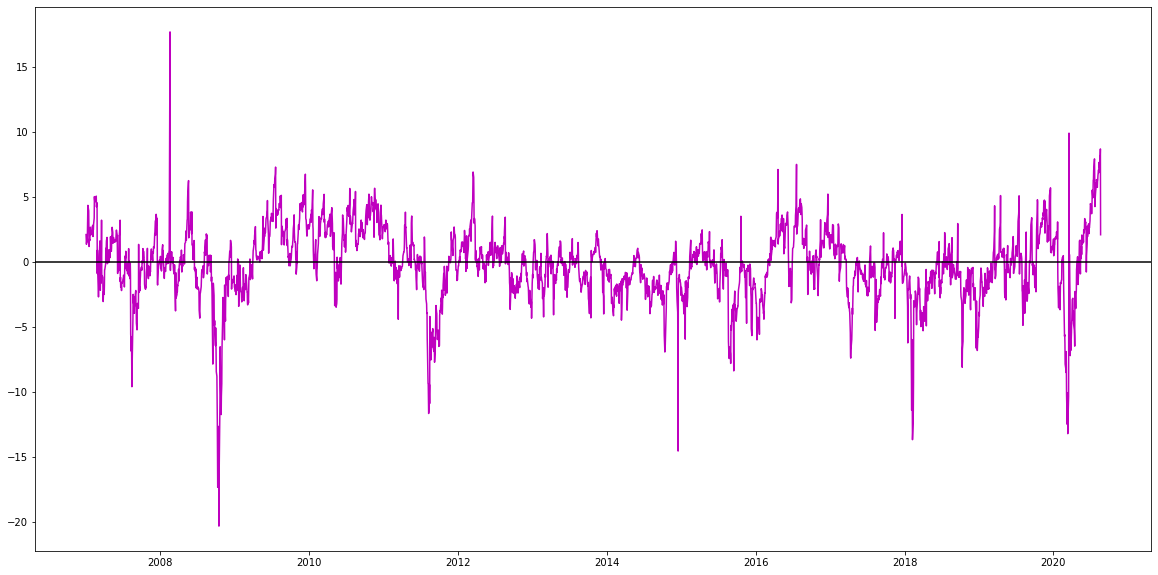

In [65]:
plt.plot(df.tradeDate, df.curve2b3, color='m')
plt.axhline(y = 0.0, color='black')
plt.show()

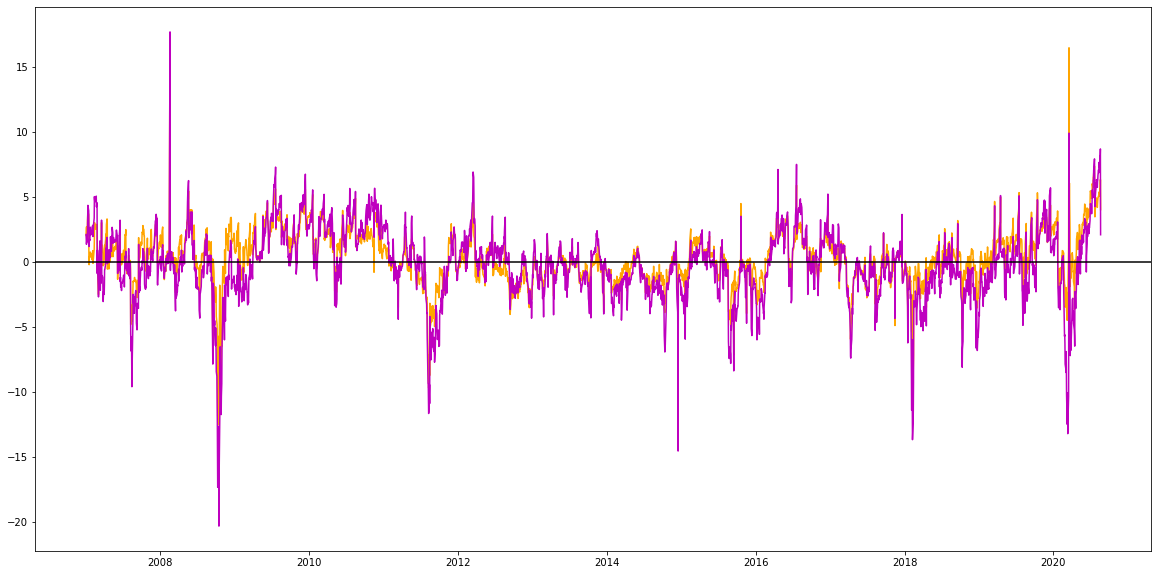

In [66]:
plt.plot(df.tradeDate, df.curve3, color='orange')
plt.plot(df.tradeDate, df.curve2b3, color='m')
plt.axhline(y = 0.0, color='black')
plt.show()

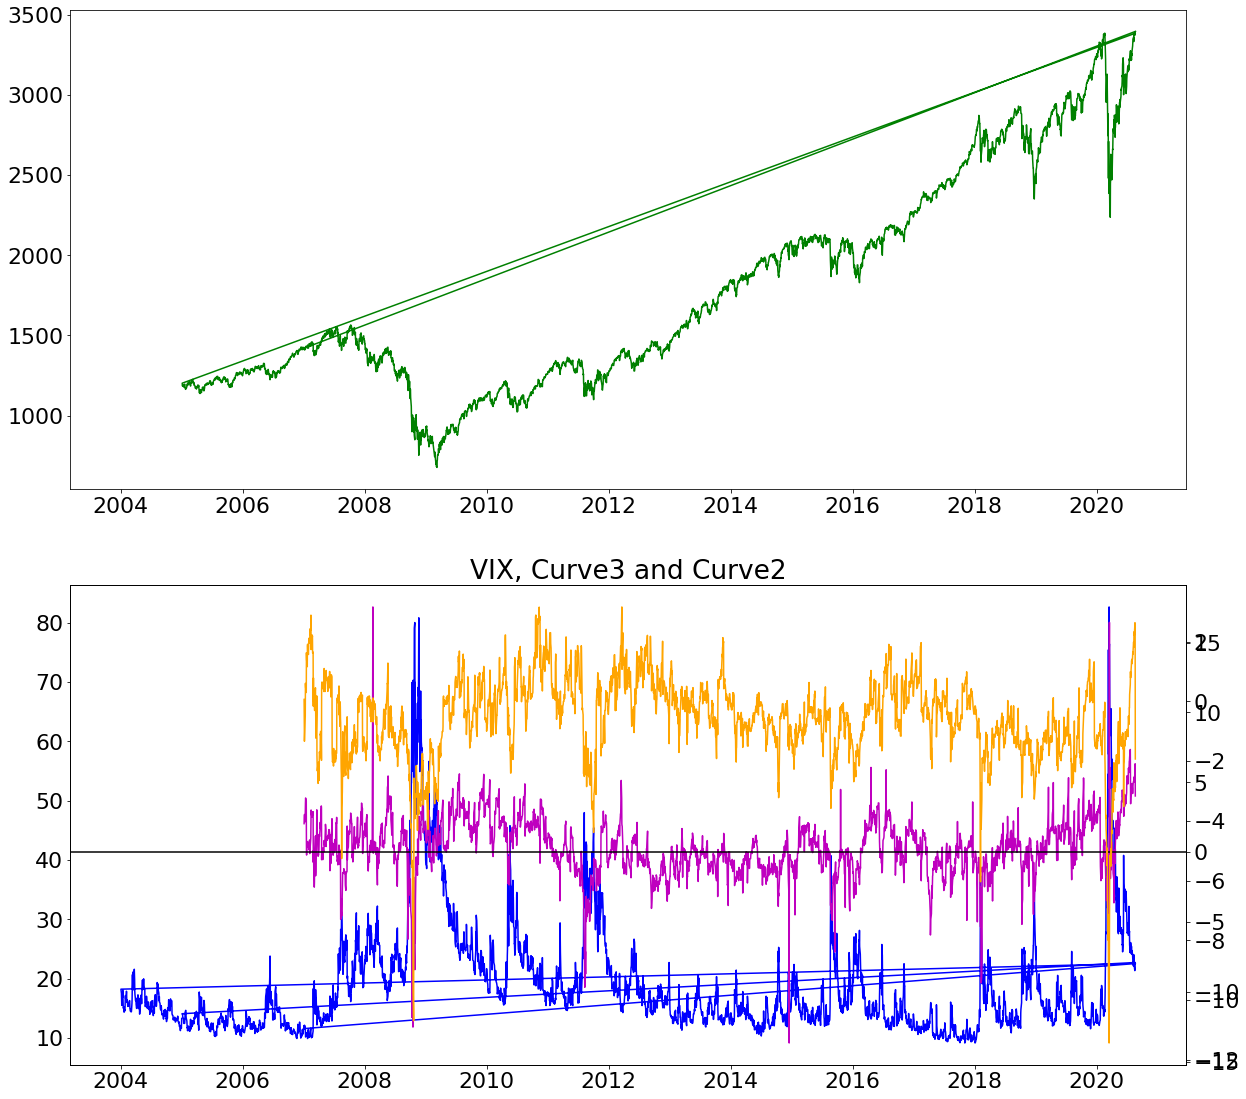

In [67]:
t = df.tradeDate
s1 = df.SPX_Close
s2 = df.VIX_Close
s3 = df.curve3
s4 = df.curve2b

fig, ax = plt.subplots(figsize=(20,30))
plt.rcParams.update({'font.size': 22})

ax1 = plt.subplot(311)
plt.plot(t, s1, color='green')#spx Close

ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2, color='blue') #VIX 
#plt.plot(t, s3, color='m')
#plt.axhline(y = 0.0, color='black')

ax3 = ax2.twinx() 
plt.plot(t, s3, color='m')#curve3 (slope Plus)Pink
plt.axhline(y = 0.0, color='black')
plt.title('VIX, Curve3 and Curve2')

ax4 = ax2.twinx()
plt.plot(t,s4, color= 'orange' ) #curve2b (future futures)

#plt.axhline(y = 0.0, color='black')
plt.show()

In [68]:
correlations = df.corr()
correlations

,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3,SPX_Close,VIX_Close,pctChgSPX,pctChgVIX,FXI_Close,pctChgFXI,curve3P,curve3N,curve3ChgState,SPXcumPChg,curve2b3
1,1.000000,0.979778,0.952256,0.928199,0.903626,0.847839,0.684148,0.400162,0.193966,-0.092124,-0.037781,-0.050833,-0.057881,-0.012171,0.063878,0.264557,0.330578,0.396437,0.636876,0.607157,0.616644,0.598941,0.510129,0.468557,0.379118,0.241753,-0.130404,0.112086,0.140191,0.151238,0.162434,0.147408,0.144808,0.119875,0.114929,0.027550,0.958213,0.670730,0.346448,0.376643,0.550231,-0.776357,0.960716,-0.783656,-0.788180,-0.579751,-0.742014,0.000171,-0.707702,-0.714276,-0.725944,-0.546923,-0.520382,-0.612197,-0.771413,-0.010104,-0.428658,0.982107,-0.092312,0.055861,-0.319801,-0.036480,0.050444,-0.050444,-0.279807,-0.499697,-0.260350
2,0.979778,1.000000,0.991193,0.977378,0.960609,0.909528,0.743365,0.417195,0.150755,-0.081887,-0.027560,-0.051449,-0.062305,-0.019543,0.055290,0.262884,0.317803,0.387581,0.563765,0.554862,0.565912,0.553943,0.467797,0.431386,0.355571,0.206822,-0.150623,0.067469,0.105506,0.120888,0.134377,0.117675,0.123174,0.102643,0.103985,0.027489,0.966973,0.655177,0.373701,0.372356,0.453393,-0.654111,0.992296,-0.666986,-0.709141,-0.432916,-0.719123,0.146659,-0.623075,-0.705852,-0.637801,-0.590850,-0.406871,-0.458651,-0.746625,0.145440,-0.475233,0.942572,-0.069884,0.030766,-0.297937,-0.024165,0.153207,-0.153207,-0.316627,-0.545710,-0.091204
3,0.952256,0.991193,1.000000,0.994753,0.984613,0.939706,0.781191,0.435021,0.120407,-0.066307,-0.018960,-0.050498,-0.066082,-0.029215,0.043829,0.251228,0.303279,0.376437,0.503998,0.502679,0.516833,0.510931,0.432675,0.402656,0.339758,0.183357,-0.163253,0.042008,0.074315,0.092175,0.107161,0.093509,0.104946,0.086283,0.093342,0.016561,0.961704,0.633484,0.391796,0.361799,0.400441,-0.560663,0.997208,-0.575314,-0.642970,-0.357841,-0.676482,0.194089,-0.527982,-0.673970,-0.540081,-0.606153,-0.296261,-0.380684,-0.701192,0.194629,-0.510530,0.905288,-0.054087,0.016320,-0.290677,-0.016169,0.184391,-0.184391,-0.345051,-0.576008,-0.001397
4,0.928199,0.977378,0.994753,1.000000,0.995513,0.954897,0.802768,0.447394,0.097197,-0.055017,-0.014501,-0.049612,-0.068855,-0.035749,0.033488,0.236083,0.291117,0.361821,0.463884,0.465011,0.479788,0.478667,0.405205,0.383579,0.325307,0.166435,-0.166990,0.030139,0.059861,0.075549,0.091245,0.080870,0.094135,0.076534,0.087558,0.010487,0.953734,0.612285,0.406264,0.353580,0.361618,-0.494114,0.993431,-0.509230,-0.594965,-0.311289,-0.638604,0.213344,-0.477425,-0.644027,-0.488617,-0.611507,-0.239242,-0.332922,-0.661875,0.214344,-0.538252,0.875617,-0.045850,0.007962,-0.289438,-0.013427,0.197841,-0.197841,-0.366758,-0.598148,0.040764
5,0.903626,0.960609,0.984613,0.995513,1.000000,0.964117,0.817303,0.456451,0.084897,-0.043200,-0.009976,-0.048856,-0.070286,-0.040840,0.023605,0.224815,0.276811,0.339719,0.429996,0.432632,0.447975,0.450452,0.382078,0.366934,0.313015,0.153030,-0.149242,0.022723,0.049321,0.062727,0.078027,0.071694,0.087462,0.071961,0.083349,0.003149,0.943225,0.594441,0.414114,0.351032,0.332116,-0.434646,0.984784,-0.450372,-0.550991,-0.272569,-0.584021,0.208871,-0.434283,-0.611478,-0.444935,-0.612632,-0.192405,-0.293230,-0.605574,0.209298,-0.566086,0.847033,-0.039790,0.003623,-0.292164,-0.011433,0.196666,-0.196666,-0.389109,-0.619234,0.059833
6,0.847839,0.909528,0.939706,0.954897,0.964117,1.000000,0.818967,0.459955,0.089301,-0.030970,-0.006004,-0.079585,-0.091661,-0.077675,0.017906,0.211308,0.250302,0.320902,0.395099,0.396269,0.413346,0.420917,0.361392,0.360937,0.306255,0.148869,-0.136567,0.015676,0.037538,0.04952

In [69]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = 1

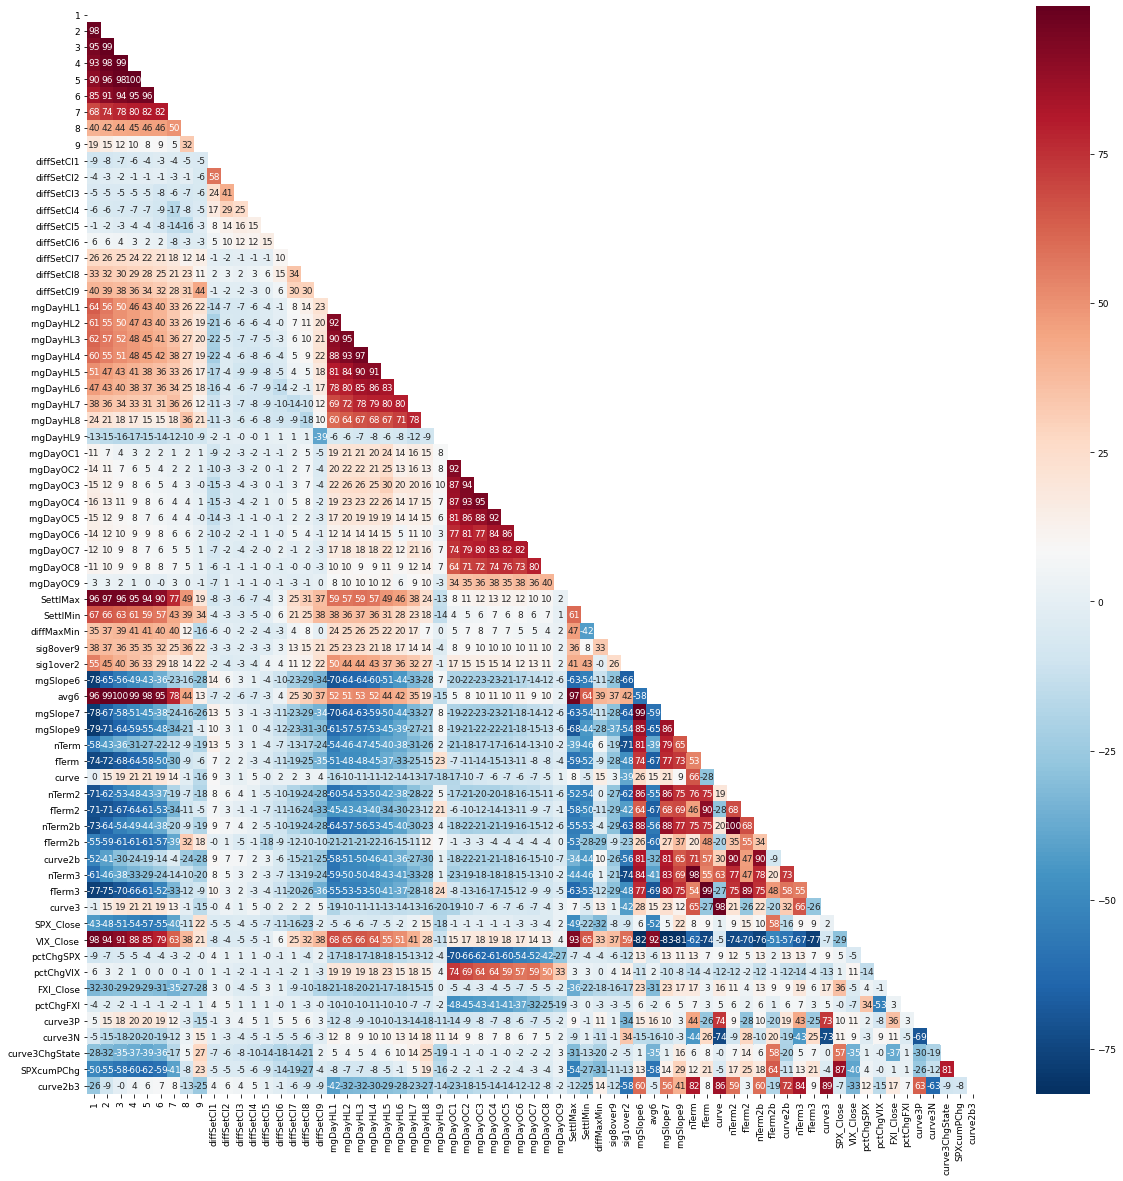

In [70]:
plt.rcParams.update({'font.size': 9})
plt.figure(figsize = (20,20))
sns.heatmap(correlations * 100, cmap='RdBu_r', annot=True, fmt='.0f', mask = mask)

In [71]:
'''chart = scatter_matrix(df, color='orange', figsize=(20,20))
#chart.set_xticklabels(rotation=145)

plt.rcParams.update({'font.size': 6})
plt.show()'''

"chart = scatter_matrix(df, color='orange', figsize=(20,20))\n#chart.set_xticklabels(rotation=145)\n\nplt.rcParams.update({'font.size': 6})\nplt.show()"

<function matplotlib.pyplot.show(*args, **kw)>

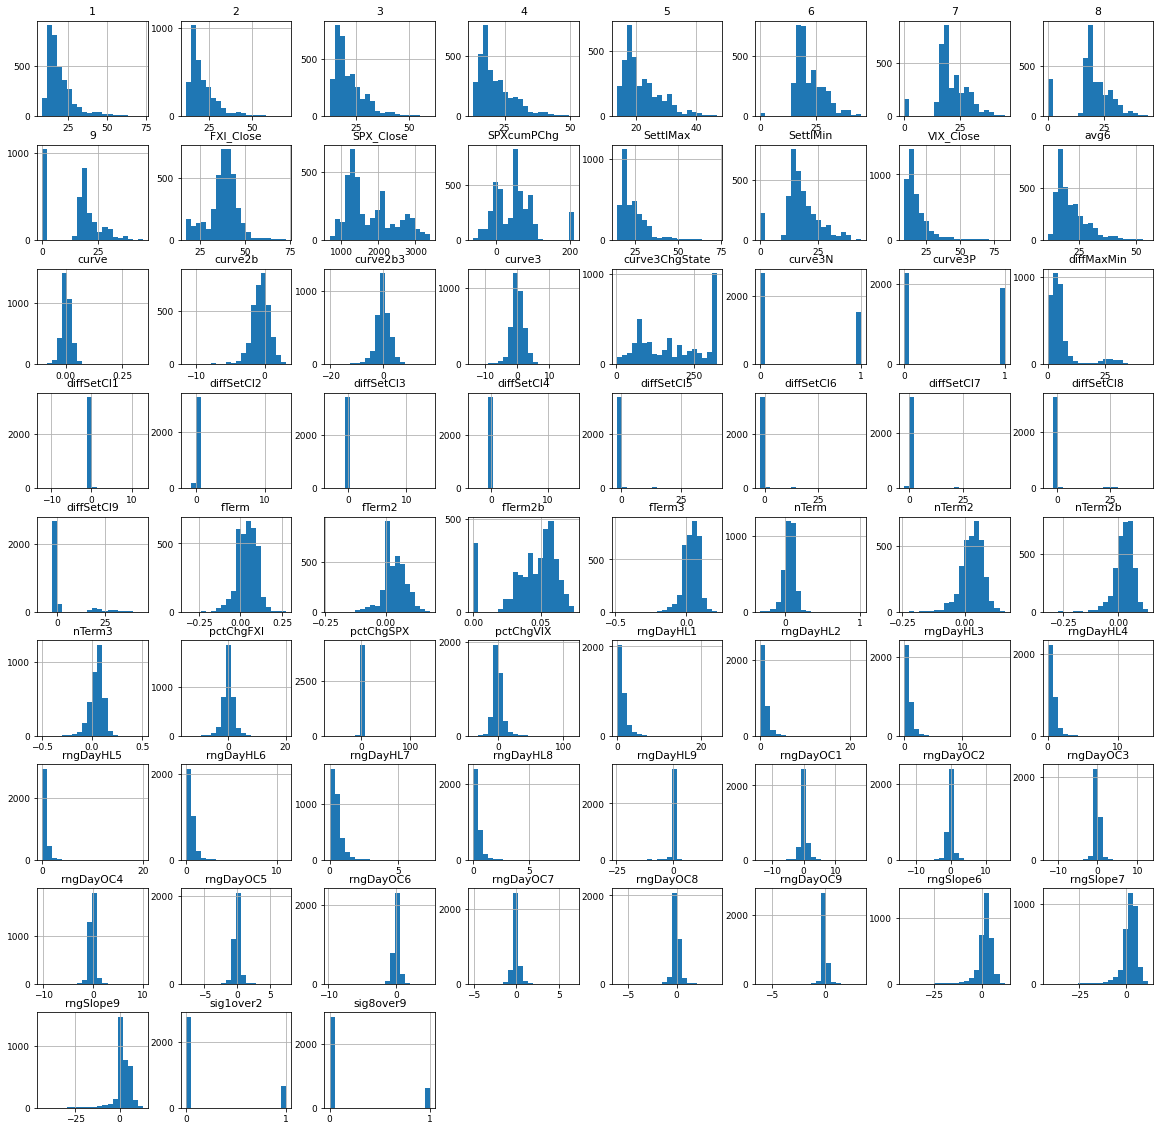

In [72]:
df.hist(figsize=(20,20), bins=20)
plt.rcParams.update({'font.size': 20})
plt.show

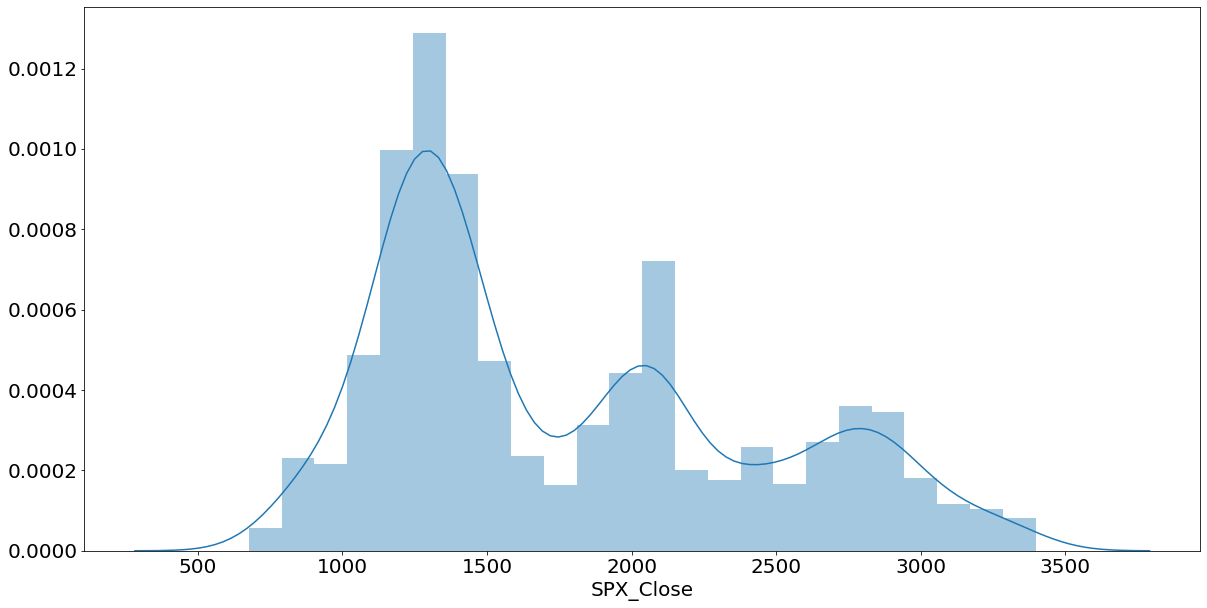

In [73]:
df.to_csv('vix-02.csv') #without column 0, 10 - 12 and the nTerms that didn't matter
sns.distplot(df.SPX_Close, label='Distribution of SPX Close')

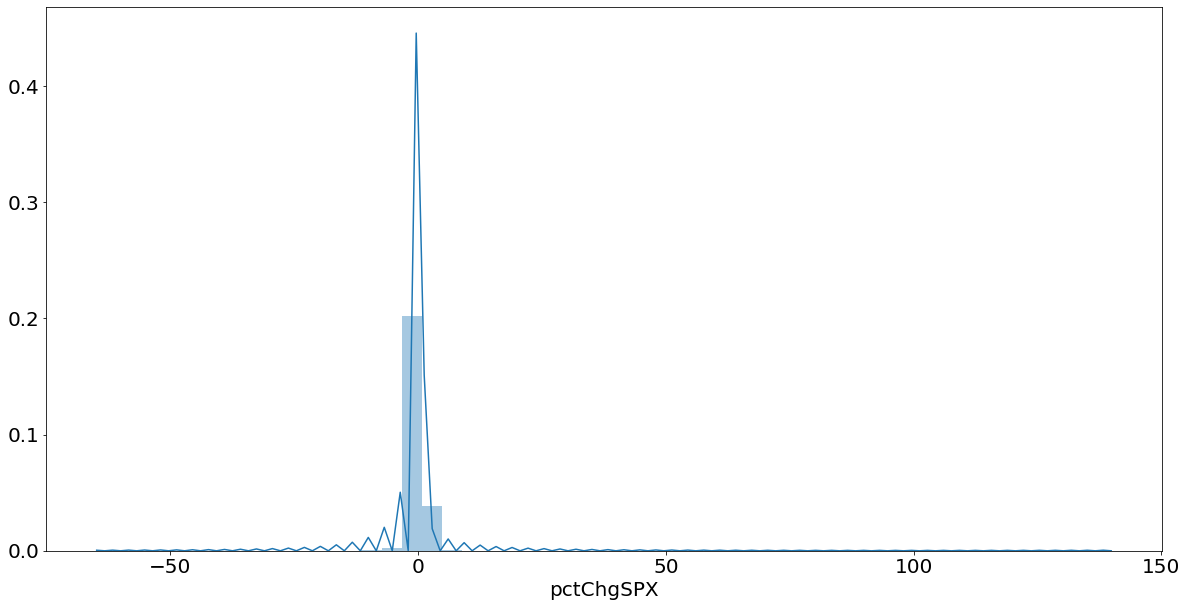

In [74]:
spxPlt = sns.distplot(df.pctChgSPX, label='Distribution Percent Change SPX')

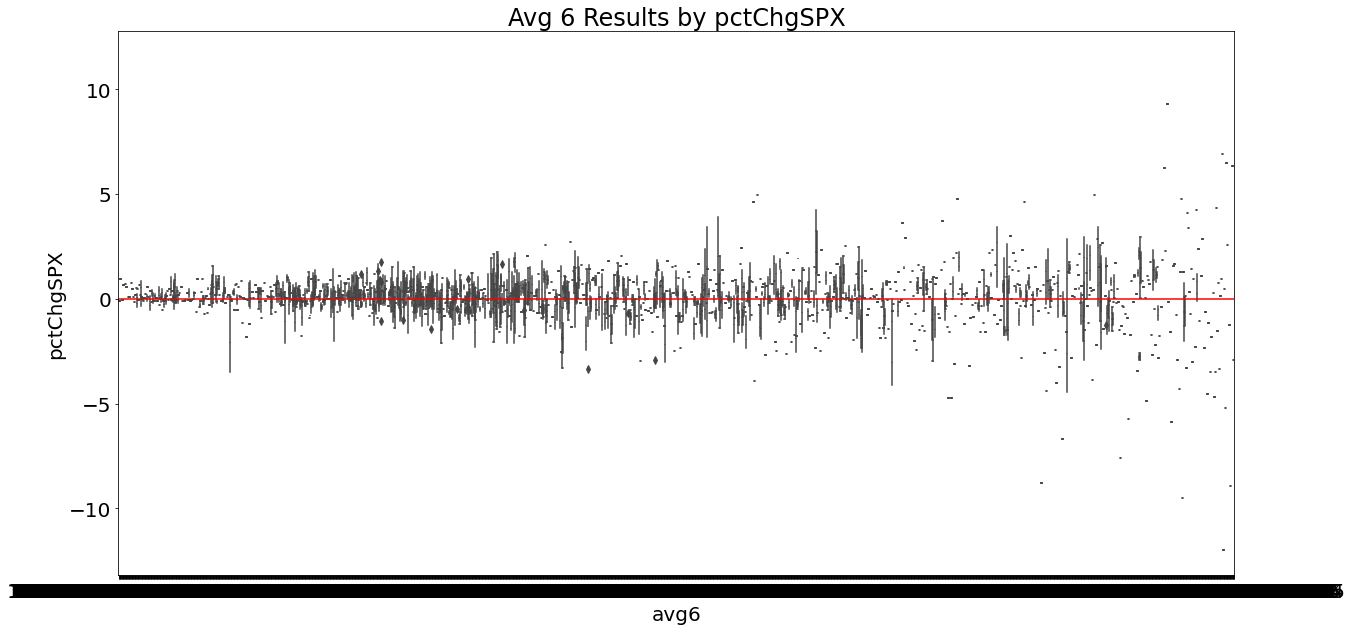

In [75]:
sns.boxplot(x='avg6', y = 'pctChgSPX', data=df)
plt.title('Avg 6 Results by pctChgSPX')
plt.axhline(y=0, xmin=0, xmax=55, color='red')
plt.show()

In [76]:
df999 = df.copy()

In [77]:
df999 = df999[['tradeDate','pctChgSPX','SPX_Close','avg6']]
df999 = df999.round(2)

In [78]:
df999['tradeDate'] = pd.to_datetime(df999['tradeDate'])

In [79]:
df999.head(1000)
df999['problem99']= np.where(df999['tradeDate']> '03/12/2010', 'X', '')

In [80]:
cond = df999['problem99'] == 'X'
rows = df999.loc[cond, :]
df999.drop(rows.index, inplace=True)
del df999['problem99']

In [81]:
df999.avg6.max()

53.81

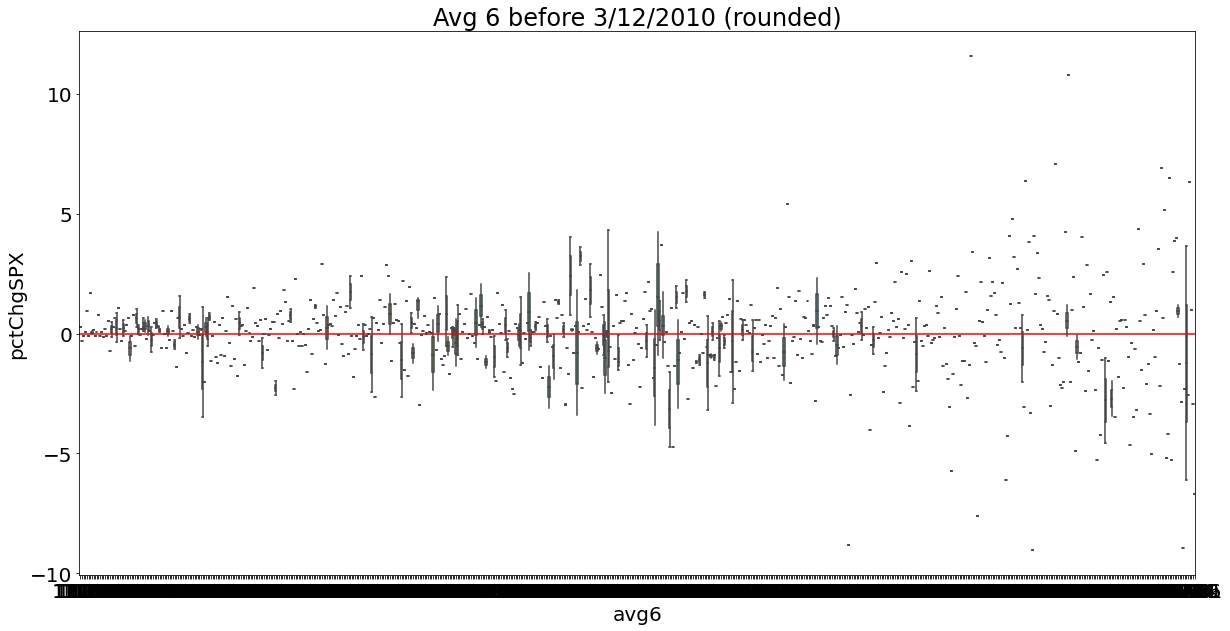

In [82]:
ax = sns.boxplot(x='avg6', y = 'pctChgSPX',data=df999)
plt.axhline(y=0, xmin=0, xmax=55, color='red')
plt.title('Avg 6 before 3/12/2010 (rounded)')
plt.show()

In [83]:
df['binnedAvg6']=pd.cut(x=df['avg6'], 
                        bins=[0, 17, 20,25,27,30],
                        labels=["low", "medium", "high", "very high","even higher"])

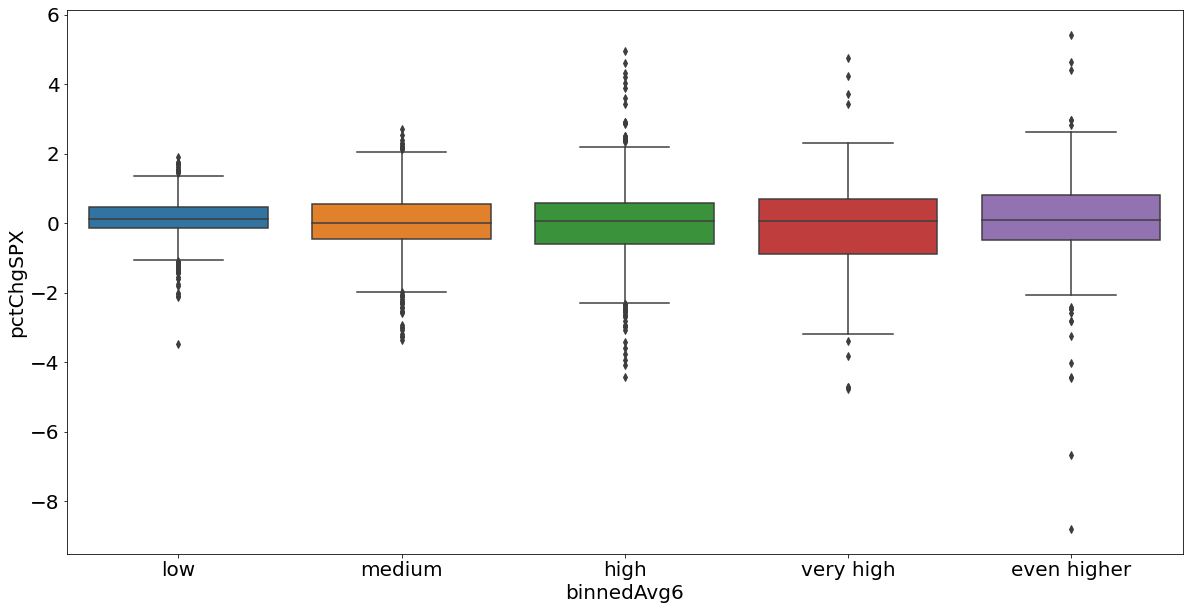

In [84]:
sns.boxplot(x='binnedAvg6', y = 'pctChgSPX', data=df)
plt.rcParams.update({'font.size': 20})

In [85]:
df.loc[df['binnedAvg6']=='high']

,tradeDate,1,2,3,4,5,6,7,8,9,diffSetCl1,diffSetCl2,diffSetCl3,diffSetCl4,diffSetCl5,diffSetCl6,diffSetCl7,diffSetCl8,diffSetCl9,rngDayHL1,rngDayHL2,rngDayHL3,rngDayHL4,rngDayHL5,rngDayHL6,rngDayHL7,rngDayHL8,rngDayHL9,rngDayOC1,rngDayOC2,rngDayOC3,rngDayOC4,rngDayOC5,rngDayOC6,rngDayOC7,rngDayOC8,rngDayOC9,SettlMax,SettlMin,diffMaxMin,sig8over9,sig1over2,rngSlope6,avg6,rngSlope7,rngSlope9,nTerm,fTerm,curve,nTerm2,fTerm2,nTerm2b,fTerm2b,curve2b,nTerm3,fTerm3,curve3,SPX_Close,VIX_Close,pctChgSPX,pctChgVIX,FXI_Close,pctChgFXI,curve3P,curve3N,curve3ChgState,SPXcumPChg,curve2b3,binnedAvg6
144,2007-07-31,20.520,20.770,21.100,20.830,20.700,20.940,20.760,0.000,0.000,-0.010,0.220,0.250,0.330,-0.270,0.630,-0.240,0.000,0.000,5.03,2.53,1.95,2.30,2.00,1.21,2.00,0.00,0.00,1.38,1.05,1.63,1.39,1.87,1.21,1.80,0.00,0.00,21.100,20.520,0.580,0.0,0.0,0.420,20.810000,0.240,0.000,0.012183,-0.003361,0.005129,0.015888,0.000000,0.015640,0.000000,0.516114,0.012037,-0.003372,0.508479,1455.270020,23.520000,-1.264664,12.697650,46.636665,0.531722,1,0,27,3.129938,1.024593,high
145,2007-08-01,21.800,21.450,21.160,20.980,20.750,20.800,21.030,0.000,0.000,-0.010,-0.170,0.010,-0.070,-0.230,-0.400,-0.650,0.000,0.000,2.10,2.06,1.67,1.57,1.34,0.84,1.28,0.00,0.00,1.11,1.19,0.44,0.42,0.09,0.20,1.25,0.00,0.00,21.800,20.750,1.050,0.0,1.0,-1.000,21.156667,-0.770,0.000,-0.016055,0.002383,-0.006085,-0.013520,0.000000,-0.013705,0.000000,-0.452268,-0.016317,0.002378,-0.616921,1465.810059,23.670000,0.724267,0.637753,45.733334,-1.936956,0,1,28,3.854205,-1.069189,high
146,2007-08-02,20.810,20.650,20.580,20.620,20.450,20.520,20.330,0.000,0.000,-0.040,-0.050,0.070,0.020,-0.090,0.000,-0.170,0.000,0.000,0.83,0.90,0.37,1.01,0.50,0.36,0.40,0.00,0.00,-0.40,-0.50,0.01,-0.41,0.34,-0.11,0.30,0.00,0.00,20.810,20.330,0.480,0.0,1.0,-0.290,20.605000,-0.480,0.000,-0.007689,-0.014064,0.002104,-0.003390,0.000000,-0.003401,0.000000,-0.112245,-0.007748,-0.014265,0.215043,1472.199951,21.219999,0.435929,-10.350658,45.400002,-0.728860,1,0,29,4.290134,0.102798,high
147,2007-08-03,22.610,22.290,22.000,21.940,21.750,21.570,21.490,0.000,0.000,0.000,-0.110,0.020,0.280,0.200,0.790,-0.010,0.000,0.000,2.89,1.67,1.38,1.21,1.31,0.63,0.90,0.00,0.00,1.82,1.62,1.23,0.87,0.80,0.63,0.90,0.00,0.00,22.610,21.490,1.120,0.0,1.0,-1.040,22.026667,-1.120,0.000,-0.014153,-0.020510,0.002098,-0.013010,0.000000,-0.013182,0.000000,-0.435000,-0.014356,-0.020940,0.217264,1433.060059,25.160000,-2.658599,18.567392,43.386665,-4.434661,1,0,29,1.631535,-0.217736,high
148,2007-08-06,22.080,21.840,21.300,21.250,21.270,21.300,21.300,0.000,0.000,-0.020,0.140,0.060,0.060,-0.060,-0.550,-0.150,0.000,0.000,1.20,1.22,1.45,1.26,0.77,0.00,0.75,0.00,0.00,-0.15,-0.30,-0.66,-0.55,-0.67,0.00,-0.35,0.00,0.00,22.080,21.250,0.830,0.0,1.0,-0.780,21.506667,-0.780,0.000,-0.010870,0.002353,-0.004363,-0.024725,0.000000,-0.025352,0.000000,-0.836620,-0.010989,0.002347,-0.440102,1467.670044,22.940001,2.415111,-8.823527,43.730000,0.791336,0,1,30,4.046646,-1.276722,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,2020-02-27,26.275,23.525,21.775,20.925,20.275,19.850,19.800,22.750,20.425,-0.325,-0.095,-0.135,-0.145,-0.115,-0.150,-0.110,-0.150,-0.095,4.70,2.95,2.40,1.85,1.35,1.14,0.93,0.72,0.72,4.10,2.62,2.06,1.57,1.09,0.85,0.62,0.62,0.52,26.275,19.800,6.475,1.0,1.0,-6.425,22.104167,-6.475,-5.850,-0.104662,-0.053763,-0.016797,-0.074389,0.122072,-0.080367,0.049322,-4.279744,-0.116897,-0.056818,-1.982598,2978.760010,39.160000,-4.416324,42.089988,40.410000,-0.761300,0,1,318,98.986116,-6.262343,high
3312,2020-02-28,26.325,23.025,21.275,20.375,19.825,19.625,19.625,22.550,20.475,0.225,0.025,0.075,0.025,0.075,0.095,0.105,0.030,0.215,4.36,2.80,2.41,2.03,1.72,1.45,1.31,1.30,0.96,-0.55,-0.75,-0.80,-0.80,-0.70,-0.39,-0.48,-0.38,-0.31,26.

In [86]:
df.rngSlope6.describe()

count    3434.000000
mean        1.849745
std         4.504330
min       -40.450000
25%         0.600000
50%         2.750000
75%         4.200000
max        12.025000
Name: rngSlope6, dtype: float64

In [87]:
df['binnedRng6']=pd.cut(x=df['rngSlope6'], 
                        bins=[-40,-20,0,2.5,5,6],
                        labels=["-40-20%","-20 - 0","0 - 2.5%", "2.5-4.5", ">4.5"])

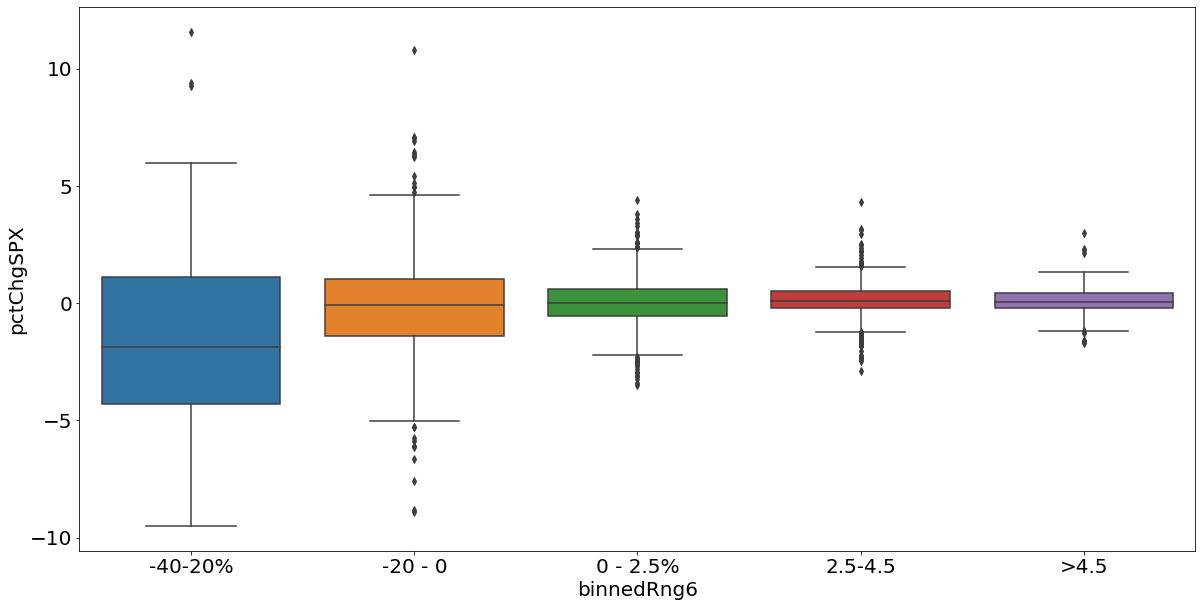

In [88]:
sns.boxplot(x='binnedRng6', y = 'pctChgSPX', data=df)

In [89]:
df.pctChgSPX.describe()

count    4190.000000
mean        0.049993
std         2.665101
min       -64.493386
25%        -0.351565
50%         0.020369
75%         0.507287
max       139.523359
Name: pctChgSPX, dtype: float64

In [90]:
df['tradeDate'] = pd.to_datetime(df['tradeDate']) #get Date into datetime so that we can cut off rows that do not match our VX df

In [91]:
## strip the df of dates before 1/3/2007 and after 8/20/2020
df['problem'] = np.where(df['tradeDate']< '01/02/2007', 'X', '')
df['problem2']= np.where(df['tradeDate']> '08/20/2020', 'X', '')

In [92]:
cond = df['problem2'] == 'X'
rows = df.loc[cond, :]
df.drop(rows.index, inplace=True)
del df['problem2']

In [93]:
cond = df['problem'] == 'X'
rows = df.loc[cond, :]
df.drop(rows.index, inplace=True)
del df['problem']

In [97]:
df.to_csv("vix-02.csv")